In [1]:
from glob import glob
import boto3
import numpy as np
import scipy.stats as sps
import nibabel as nib
import matplotlib.pyplot as plt

In [2]:
ids = list(set([foo.split('/')[-1].split('-')[0] for 
                foo in glob('/Users/arokem/data/mri2mri/t1_pdd_cosine_L1_unet128_T3_3d/*')]))

In [3]:
ids.pop(ids.index("volumes"))

'volumes'

In [4]:
client = boto3.resource('s3')
bucket_name = 'arokem.mri2mri.dwi-predictions'
b = client.Bucket(bucket_name)

In [5]:
experiment = "t1_fa_L1_unet128_T3_3d"
sigma = 0
results = {"err_nn": [], 'err_template': []}
for subject in ids:
        b.download_file('%s/test_lowest_val/gaussian_%s/errors/%s_error_nn.nii.gz'%(experiment, sigma, subject), 'error_nn.nii.gz')
        b.download_file('%s/test_lowest_val/gaussian_%s/errors/%s_error_template.nii.gz'%(experiment, sigma, subject), 'error_template.nii.gz')
        error_nn = nib.load('error_nn.nii.gz').get_data()
        error_template = nib.load('error_template.nii.gz').get_data()
        results["err_nn"].append(np.nanmean(np.sqrt(error_nn)))
        results["err_template"].append(np.nanmean(np.sqrt(error_template)))

MannwhitneyuResult(statistic=213.0, pvalue=1.38193459378001e-23)


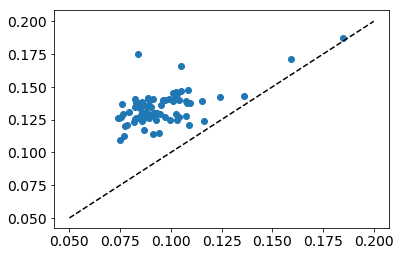

In [13]:
fig, ax = plt.subplots(1)
ax.scatter(results["err_nn"], results["err_template"])
ax.plot([0.05, 0.2], [0.05, 0.2], 'k--')
print(sps.mannwhitneyu(results["err_nn"], results["err_template"]))

In [14]:
import matplotlib

In [15]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

MannwhitneyuResult(statistic=213.0, pvalue=1.38193459378001e-23)


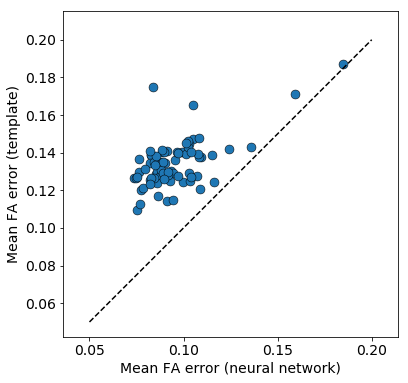

In [19]:
fig, ax = plt.subplots(1)
ax.scatter(results["err_nn"], results["err_template"], s=80, linewidth=0.5, edgecolors='k')
ax.plot([0.05, 0.2], [0.05, 0.2], 'k--')
ax.axis("equal")
ax.set_xlabel("Mean FA error (neural network)")
ax.set_ylabel("Mean FA error (template)")
fig.set_size_inches([6,6])
print(sps.mannwhitneyu(results["err_nn"], results["err_template"]))



In [10]:
results["0"]["median_err_nn"]

KeyError: '0'